# 1.The first part: view the version of libs

In [67]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt
print("sys version: {}".format(sys.version))
print("pandas version: {}".format(pd.__version__))
print("matplotlib version: {}".format(matplotlib.__version__))
print("numpy version: {}".format(np.__version__))
print("scipy version: {}".format(sp.__version__))
print("IPython version: {}".format(IPython.__version__))
print("sklearn version: {}".format(sklearn.__version__))

sys version: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.2.4
matplotlib version: 3.3.4
numpy version: 1.20.1
scipy version: 1.6.2
IPython version: 7.22.0
sklearn version: 0.24.1


# 2.load data

In [68]:
from sklearn.datasets import load_iris
iris_dataset= load_iris()

In [121]:
#print("iris_dataset: {}".format(iris_dataset))

In [122]:
#print("key of iris_dataset: {}".format(iris_dataset.keys()))

In [123]:
#print("data: {}".format(iris_dataset['data'])) #items: samples and properties: features

In [124]:
#print("target: {}".format(iris_dataset['target']))

In [73]:
print("frame: {}".format(iris_dataset['frame']))

frame: None


In [74]:
print("target names: {}".format(iris_dataset['target_names']))

target names: ['setosa' 'versicolor' 'virginica']


In [126]:
#print("DESCR of iris_dataset: {}".format(iris_dataset['DESCR']))

In [76]:
print("feature names: {}".format(iris_dataset['feature_names']))

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [77]:
print("filename: {}".format(iris_dataset['filename']))

filename: C:\Users\hoang\anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv


# 2.1more depth

In [78]:
print("type of data: {}".format(type(iris_dataset)))

type of data: <class 'sklearn.utils.Bunch'>


In [79]:
print("Shape of data: {}".format(iris_dataset['data'].shape)) 
# 150 rows, 4 cols [shape of data array: the number of samples multiplied by the number of feature] (row-col)


Shape of data: (150, 4)


In [80]:
print("first five rows of data: \n{}".format(iris_dataset['data'][:5]))
#Attribute Information: (sepal:đài hoa , petal:cánh hoa)
#       - sepal length in cm 
#       - sepal width in cm
#       - petal length in cm
#       - petal width in cm

first five rows of data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


# 3.Prepared Data

### Splitting the data into training set/ traning data and test set/ test data/ hold-out set
75% for training set and 25% for test set
data: a capital X
labels: a lowercase y (f(x)=y)

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test= train_test_split(iris_dataset['data'] ,iris_dataset['target'], random_state=0)
iris_dataset['data'].shape, iris_dataset['target'].shape

((150, 4), (150,))

In [82]:
print("X_train: {}".format(X_train.shape)) #hàng-cột

X_train: (112, 4)


In [83]:
print("y_train: {}".format(y_train.shape))

y_train: (112,)


In [84]:
print("X_test: {}".format(X_test.shape))

X_test: (38, 4)


In [85]:
print("y_test: {}".format(y_test.shape))

y_test: (38,)


### Buiding the data
-should inspect the data before buiding the model, if the task is easily solvable without ML, or if the desired information might not be contained in the data => not need to ML
-Inspecting data is a good way to find abnormalities and peculiarities (bất thường và đặc thù)
ex: the measurement using inch not cm that can be unexpected measurements
one of the best way => #visualize it => one way: scatter plot
-normal the screen only display 2-3 dimensions => hard to visualize 4 or more => "pair plot" (cặp bản vẽ) but does not show the interaction of all of features at once => some aspects of data may not revealed when visualizing in this way

In [86]:
#first convert the numpy array to pandas dataframe => it has a func to create pair plots called scatter_matric (ma trận phân tán)
#the diagonal of the matrix is filled with histograms (biểu đồ) of each feature

In [87]:
#feature names
print("iris_dataset.feature_names: {}".format(iris_dataset.feature_names))

iris_dataset.feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [88]:
#create the dataframe from the data in X_train
#lable the cols using the string in iris_dataset.feature_names
iris_dataframe= pd.DataFrame(X_train, columns= iris_dataset.feature_names)

### Các hàm thông dụng của dataframe

In [89]:
iris_dataframe.info() #thông tin của dataframe như tên cột, kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  112 non-null    float64
 1   sepal width (cm)   112 non-null    float64
 2   petal length (cm)  112 non-null    float64
 3   petal width (cm)   112 non-null    float64
dtypes: float64(4)
memory usage: 3.6 KB


In [90]:
iris_dataframe.columns #tên các comlums, nó ở dạng obj

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [91]:
list(iris_dataframe.columns)#tên các comlums, để trong 1 list

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [92]:
iris_dataframe.index #đánh số từ bao nhiêu đến bao nhiêu, index=1 => liên tục, không bị ngắt quãng

RangeIndex(start=0, stop=112, step=1)

In [93]:
iris_dataframe.describe() #thống kê lại cả bảng
#count: số tổng (được áp dụng với cột nào kiểu dữ liệu là số, nếu cột kiểu dữ liệu là obj/ string => không hiển thị)
#mean: giá trị trung bình
#std: độ lệch chuẩn

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000000,112.000000,112.000000,112.000000
mean,5.886607,3.051786,3.796429,1.223214
std,0.871314,0.436196,1.800697,0.781427
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


In [94]:
iris_dataframe.describe(include="all") #thống kê lại cả bảng bao gồm cả cột mà datatype là string /obj
#những gì thống kê được nó sẽ thông kê ra

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000000,112.000000,112.000000,112.000000
mean,5.886607,3.051786,3.796429,1.223214
std,0.871314,0.436196,1.800697,0.781427
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


### loc and iloc

In [95]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


In [96]:
iris_dataframe.loc[(iris_dataframe['sepal length (cm)']==6.9)  & (iris_dataframe['petal length (cm)']==5.1), ['sepal length (cm)', 'sepal width (cm)']] 
#lọc ra những giá trị theo yêu cầu
#trong trường hợp bình thườn, tên cột không chứa dấu "cách" =>iris_dataframe.loc[iris_dataframe.colName == 6.9]
#cái argument thứ 2 là 1 list các cột mình muốn hiển thị ra

,sepal length (cm),sepal width (cm)
4,6.9,3.1


In [97]:
iris_dataframe.iloc[10]

sepal length (cm)    6.0
sepal width (cm)     2.2
petal length (cm)    5.0
petal width (cm)     1.5
Name: 10, dtype: float64

In [98]:
type(iris_dataframe.iloc[10])
#nó có kiểu dữ liệu là series

pandas.core.series.Series

In [99]:
iris_dataframe.iloc[[10]] #thêm dấu [] bên trong thì nó return ra kiểu là dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
10,6.0,2.2,5.0,1.5


In [100]:
iris_dataframe.iloc[3:11] #từ hàng 3 CHO ĐẾN 10 nên phải dùng 11

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
5,5.0,3.5,1.6,0.6
6,5.4,3.7,1.5,0.2
7,5.0,2.0,3.5,1.0
8,6.5,3.0,5.5,1.8
9,6.7,3.3,5.7,2.5
10,6.0,2.2,5.0,1.5


In [101]:
iris_dataframe.iloc[3:5] 
# đằng trước : không có gì => ngầm hiểu đó là từ 0 đến -1 là cái áp chót

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


In [102]:
iris_dataframe.iloc[3:5, :-2]

,sepal length (cm),sepal width (cm)
3,4.7,3.2
4,6.9,3.1


In [103]:
iris_dataframe.iloc[3:5, -1] #chỉ lấy cột nào

3    0.2
4    2.3
Name: petal width (cm), dtype: float64

### Data Manipulation

In [104]:
#do data ban đầu không có cột nào chứa ký tự là chữ vd như '$'
# => tạo ra một dataframe mới
X_new_data_manipulation= {'Name':['phong','phong','huong','van','son'],'Month':[1,2,5,7,10], 'Salary':['$5','$90','$4', '$2', '$10']}
df_new_data_manipulation=pd.DataFrame(X_new_data_manipulation)
print(X_new_data_manipulation)
print(df_new_data_manipulation)
#X_new_data_manipulation[2].dtype

{'Name': ['phong', 'phong', 'huong', 'van', 'son'], 'Month': [1, 2, 5, 7, 10], 'Salary': ['$5', '$90', '$4', '$2', '$10']}
    Name  Month Salary
0  phong      1     $5
1  phong      2    $90
2  huong      5     $4
3    van      7     $2
4    son     10    $10


In [105]:
df_new_data_manipulation.Salary.dtype
df_new_data_manipulation.Name.dtype
#type 'o' => obj trong python
# https://github.com/CodexploreRepo/data_science/blob/main/Pages/A02_Pandas_Cheat_Sheet.md

dtype('O')

In [106]:
# ví dụ sau này cần lấy salary đẻ build model => cần convert từ obj sang số 
df_new_data_manipulation.Salary.apply(lambda x : x.replace('$',''))
#đơn giản là dùng lamda để thay thế tất cả '$' =>''

0     5
1    90
2     4
3     2
4    10
Name: Salary, dtype: object

In [107]:
# bây giờ cần chuyển nó thành fload
df_new_data_manipulation.Salary.apply(lambda x : float(x.replace('$','')))
# số thực 64 bit

0     5.0
1    90.0
2     4.0
3     2.0
4    10.0
Name: Salary, dtype: float64

In [108]:
df_new_data_manipulation.Salary=df_new_data_manipulation.Salary.apply(lambda x : float(x.replace('$','')))
df_new_data_manipulation.head()

,Name,Month,Salary
0,phong,1,5.0
1,phong,2,90.0
2,huong,5,4.0
3,van,7,2.0
4,son,10,10.0


### tạo thêm cột cho df

In [109]:
df_new_data_manipulation['total_money'] = df_new_data_manipulation.Month*df_new_data_manipulation.Salary
df_new_data_manipulation

,Name,Month,Salary,total_money
0,phong,1,5.0,5.0
1,phong,2,90.0,180.0
2,huong,5,4.0,20.0
3,van,7,2.0,14.0
4,son,10,10.0,100.0


### Tính tổng 1 cột

In [110]:
revenue=df_new_data_manipulation['total_money'].sum()
print(revenue)

319.0


In [111]:
not_sort=df_new_data_manipulation.groupby("Name")['total_money'].sum()
#groupby tất cả theo tên rồi chỉ lấy cột tiền sau đó sum thì ra của mỗi người 

In [112]:
not_sort.sort_values()
#sort tăng dần

Name
van       14.0
huong     20.0
son      100.0
phong    185.0
Name: total_money, dtype: float64

In [113]:
not_sort.sort_values(ascending=False)
#sort giảm dần

Name
phong    185.0
son      100.0
huong     20.0
van       14.0
Name: total_money, dtype: float64

### unique value

In [114]:
df_new_data_manipulation.Name.value_counts()
#số lượng xuất hiện theo tên

phong    2
van      1
huong    1
son      1
Name: Name, dtype: int64

In [115]:
df_new_data_manipulation.Name.value_counts().count()
#số lượng tên xuất hiện

4

In [116]:
df_new_data_manipulation.Name.nunique()
#tương tự trên

4

<Figure size 432x288 with 0 Axes>

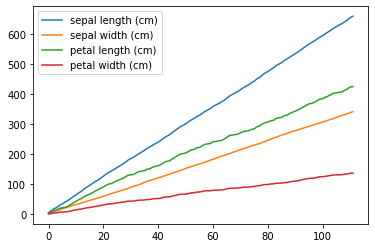

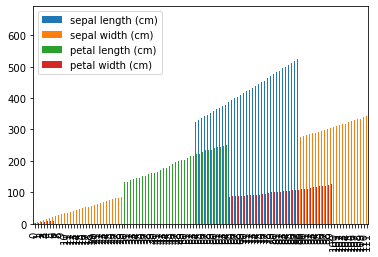

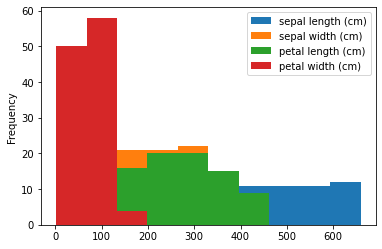

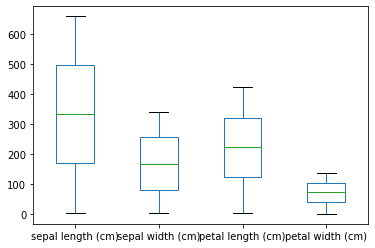

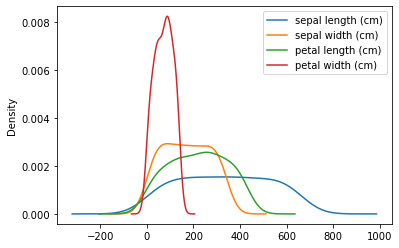

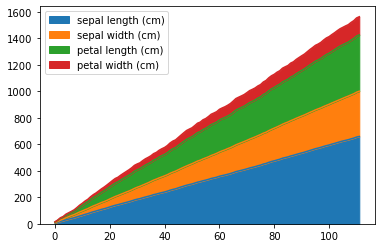

In [117]:
#test in https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
df = iris_dataframe.cumsum()
plt.figure()
df.plot();
df.plot(kind="bar");
df.plot(kind="hist");
df.plot(kind="box");
df.plot(kind="kde");
df.plot(kind="area");



In [118]:
#show the iris_dataframe of X_train
print("iris_dataframe of X_train: \n {}".format(iris_dataframe))

iris_dataframe of X_train: 
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.9               3.0                4.2               1.5
1                  5.8               2.6                4.0               1.2
2                  6.8               3.0                5.5               2.1
3                  4.7               3.2                1.3               0.2
4                  6.9               3.1                5.1               2.3
..                 ...               ...                ...               ...
107                4.9               3.1                1.5               0.1
108                6.3               2.9                5.6               1.8
109                5.8               2.7                4.1               1.0
110                7.7               3.8                6.7               2.2
111                4.6               3.2                1.4               0.2

[112 rows x 4 columns]


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

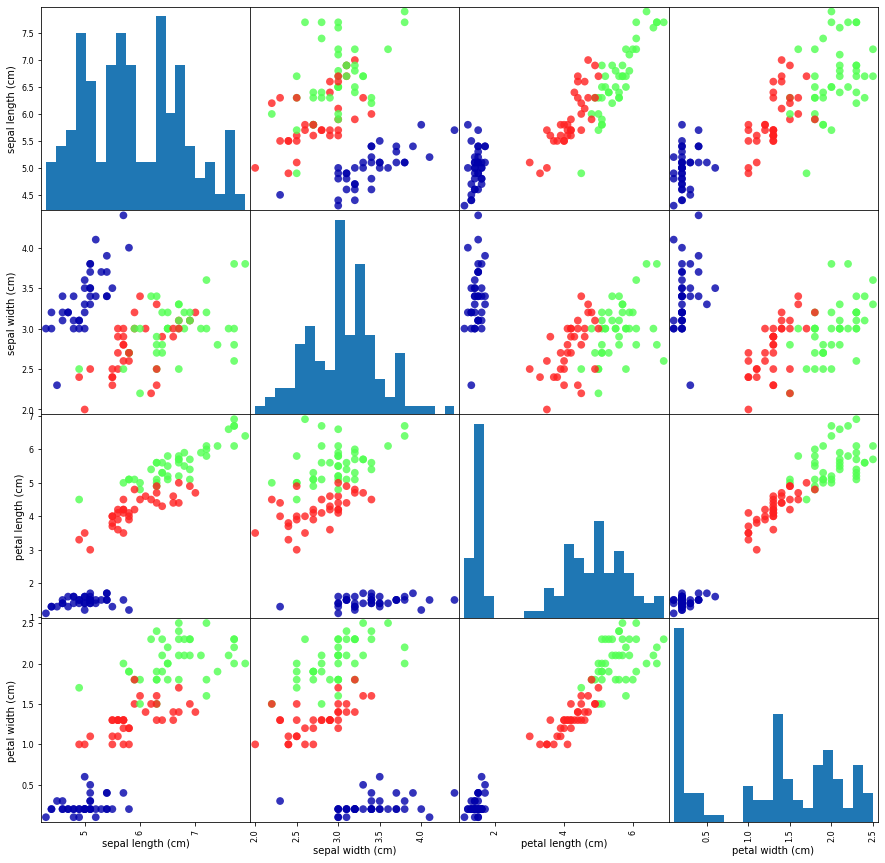

In [119]:
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(
    iris_dataframe, #dataframe
    c=y_train, 
    figsize=(15, 15),#figsize(float,float), optional [A tuple (width, height) in inches.]
    marker='Son Hoang',#[str, optional]: Matplotlib marker type, default ‘.’.
    hist_kwds={'bins': 20},
    s=60,
    alpha=0.8, #[keyword]: Amount of transparency applied. (độ trong suốt)
    cmap=mglearn.cm3,
    grid=True,
   
)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(
    n_neighbors=10,#neighbors=1
    weights = 'distance', # ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    p = 2  
) 

In [ ]:
print("X_train: {}".format(X_train))
print("y_train: {}".format(y_train))
knn.fit(X_train, y_train) #train the model by training set
#each item belongs to an element of y_train array

In [ ]:
X_new= np.array([[5,2.9,1,0.2]]) # create a random iris information
print("new iris example (X_new.shape):{}".format(X_new.shape))
X_iris_new_dataframe= pd.DataFrame(X_new, columns= iris_dataset.feature_names)
print("new iris example (X_iris_new_dataframe):\n{}".format(X_iris_new_dataframe))

In [ ]:
prediction= knn.predict(X_new)
print("type of prediction: {}".format(type(prediction)))
print("Prediction: {}".format(prediction))
print("Predicted Target name: {}".format(iris_dataset['target_names'][prediction]))

### Evaluating the Model

In [ ]:
y_pred= knn.predict(X_test)
print("Test Data Predictions: \n{}".format(y_pred))

In [ ]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
